In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [2]:
import librosa
import librosa.display
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [3]:
np.random.seed(18)

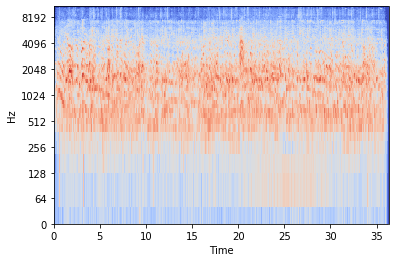

In [4]:
y, sr= librosa.core.load("./Coffee-shop-background-noise.wav")
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_db = librosa.core.power_to_db(S)

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
librosa.display.specshow(S_db, y_axis='log', sr=sr, x_axis='time', ax=ax)

In [ ]:
class CustomDataset(Dataset):
	def __init__(self, wake_word_path, background_sounds_root_path = "C:/Users/DACUS/Desktop/UrbanSound8K/audio/fold1"):
		self.wake_word_path = wake_word_path
        self.background_sounds_root_path = background_sounds_root_path
        self.background_noise_sound_paths =  list(pathlib.Path(background_sounds_root_path).glob('*.wav'))

	def __getitem__(self, idx):
		background_noise_path = self.background_noise_sound_paths[idx]

		generated_sample = None
        generated_labels = None
        return generated_sample, generated_labels


	def __len__(self):
		return len(self.background_noise_sound_paths)

In [ ]:
def get_random_time_interval(interval_size, max_size):  
    inerval_start = np.random.randint(low=0, high=max_size-interval_size)
    interval_end = segment_start + segment_ms - 1
    
    return inerval_start, interval_end

In [ ]:
def generate_sample(background, addition):
    return (background + addition) / 2